In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error, \
    mean_squared_error, r2_score, f1_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from torch.nn.functional import grid_sample
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor, CatBoostClassifier

In [10]:
df = pd.read_csv('datasets/user_behavior_data.csv')

In [3]:
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122.0,40.0,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944.0,47.0,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,NaN,42.0,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871.0,20.0,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988.0,31.0,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,NaN,22.0,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,NaN,59.0,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457.0,50.0,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224.0,44.0,Male,1


In [11]:
df.drop(columns="User ID", inplace=True)

<Axes: xlabel='User Behavior Class', ylabel='count'>

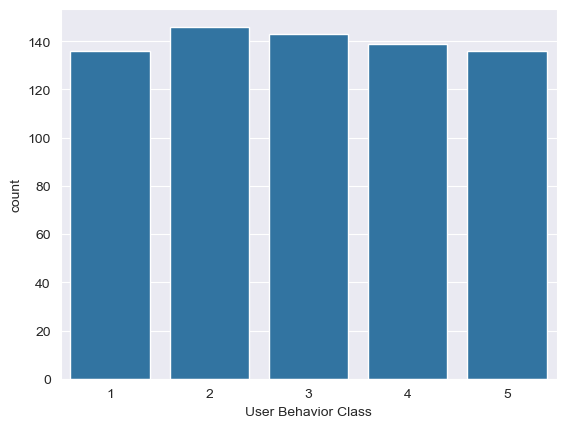

In [27]:
sns.countplot(x='User Behavior Class', data= df)
#balansirani se 

In [28]:
df['Operating System'].unique()

array(['Android', 'iOS'], dtype=object)

In [14]:
df['Operating System'] = df['Operating System'].fillna(df['Operating System'].mode()[0])

In [29]:
df.isnull().sum()

Device Model                    0
Operating System                0
App Usage Time (min/day)        0
Screen On Time (hours/day)      0
Battery Drain (mAh/day)         0
Number of Apps Installed        0
Data Usage (MB/day)           140
Age                            35
Gender                          0
User Behavior Class             0
dtype: int64

<Axes: >

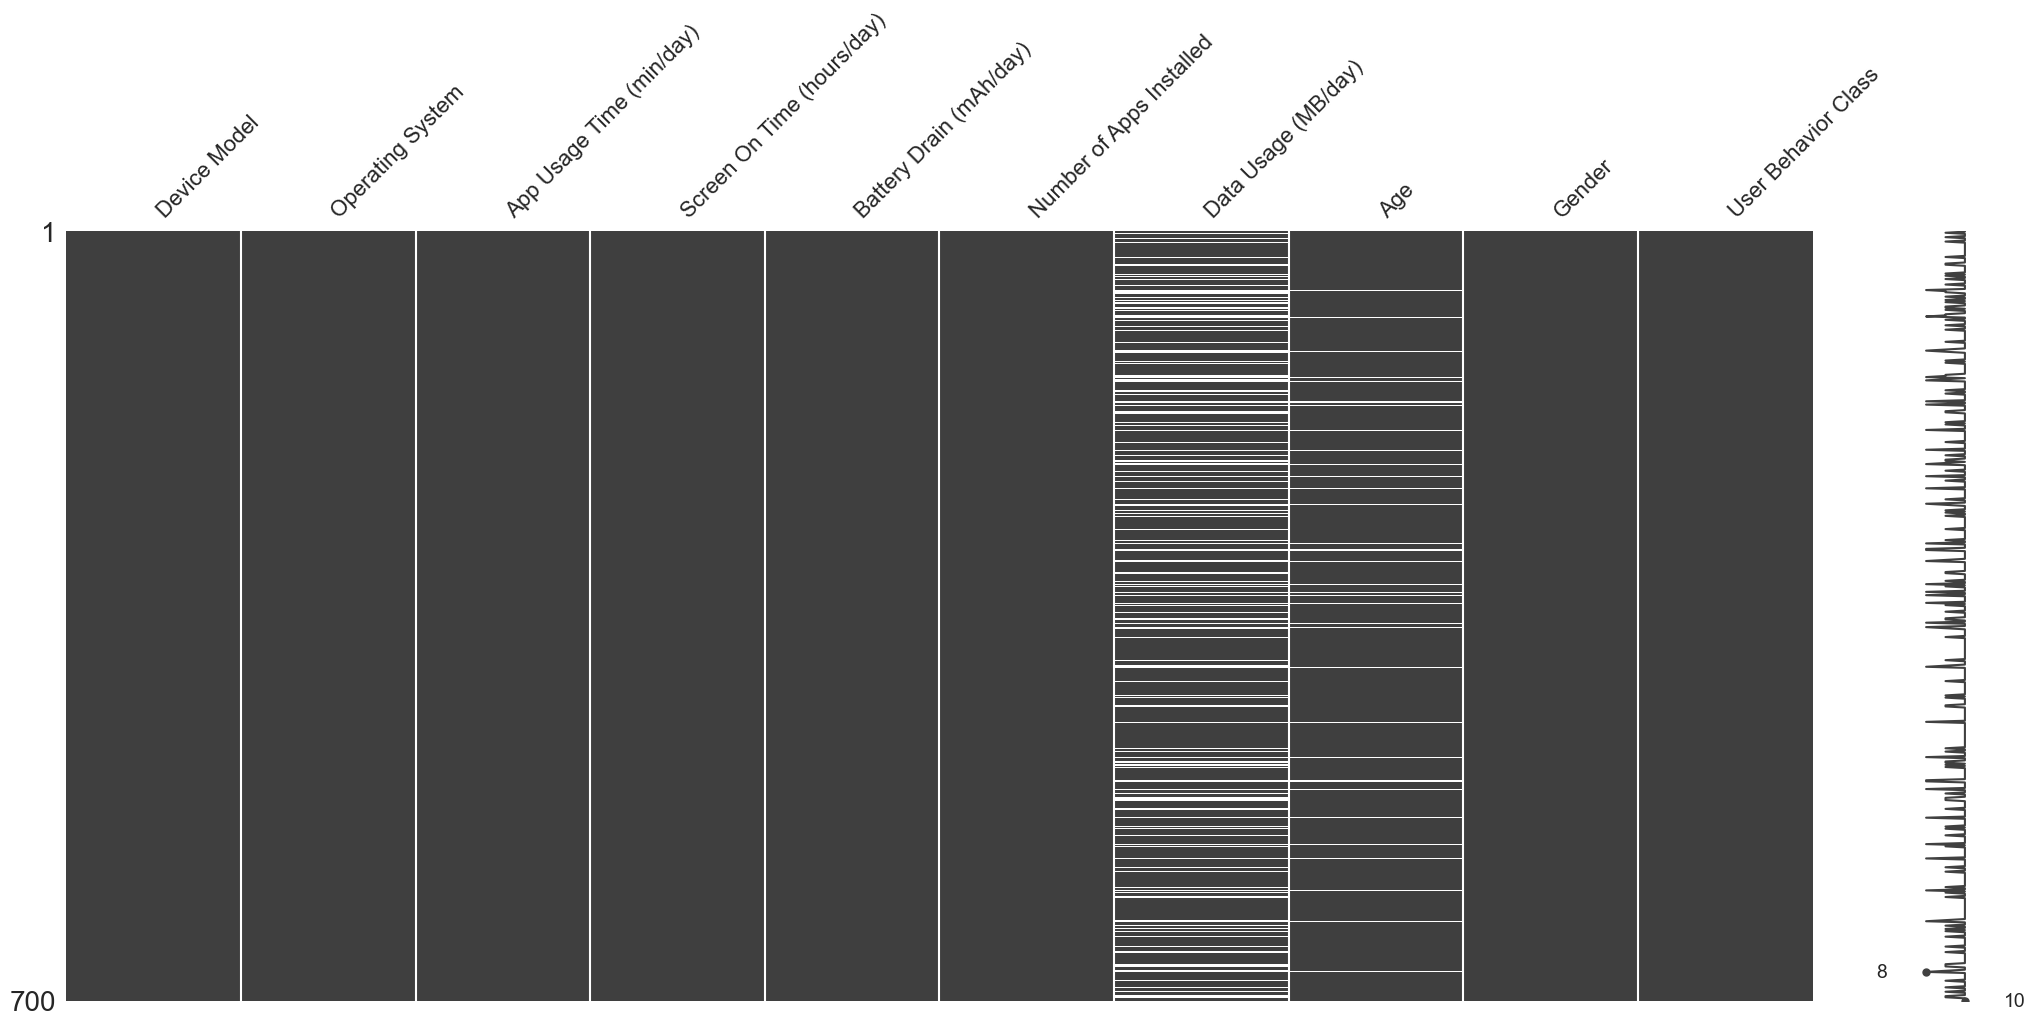

In [17]:
msno.matrix(df)

<Axes: >

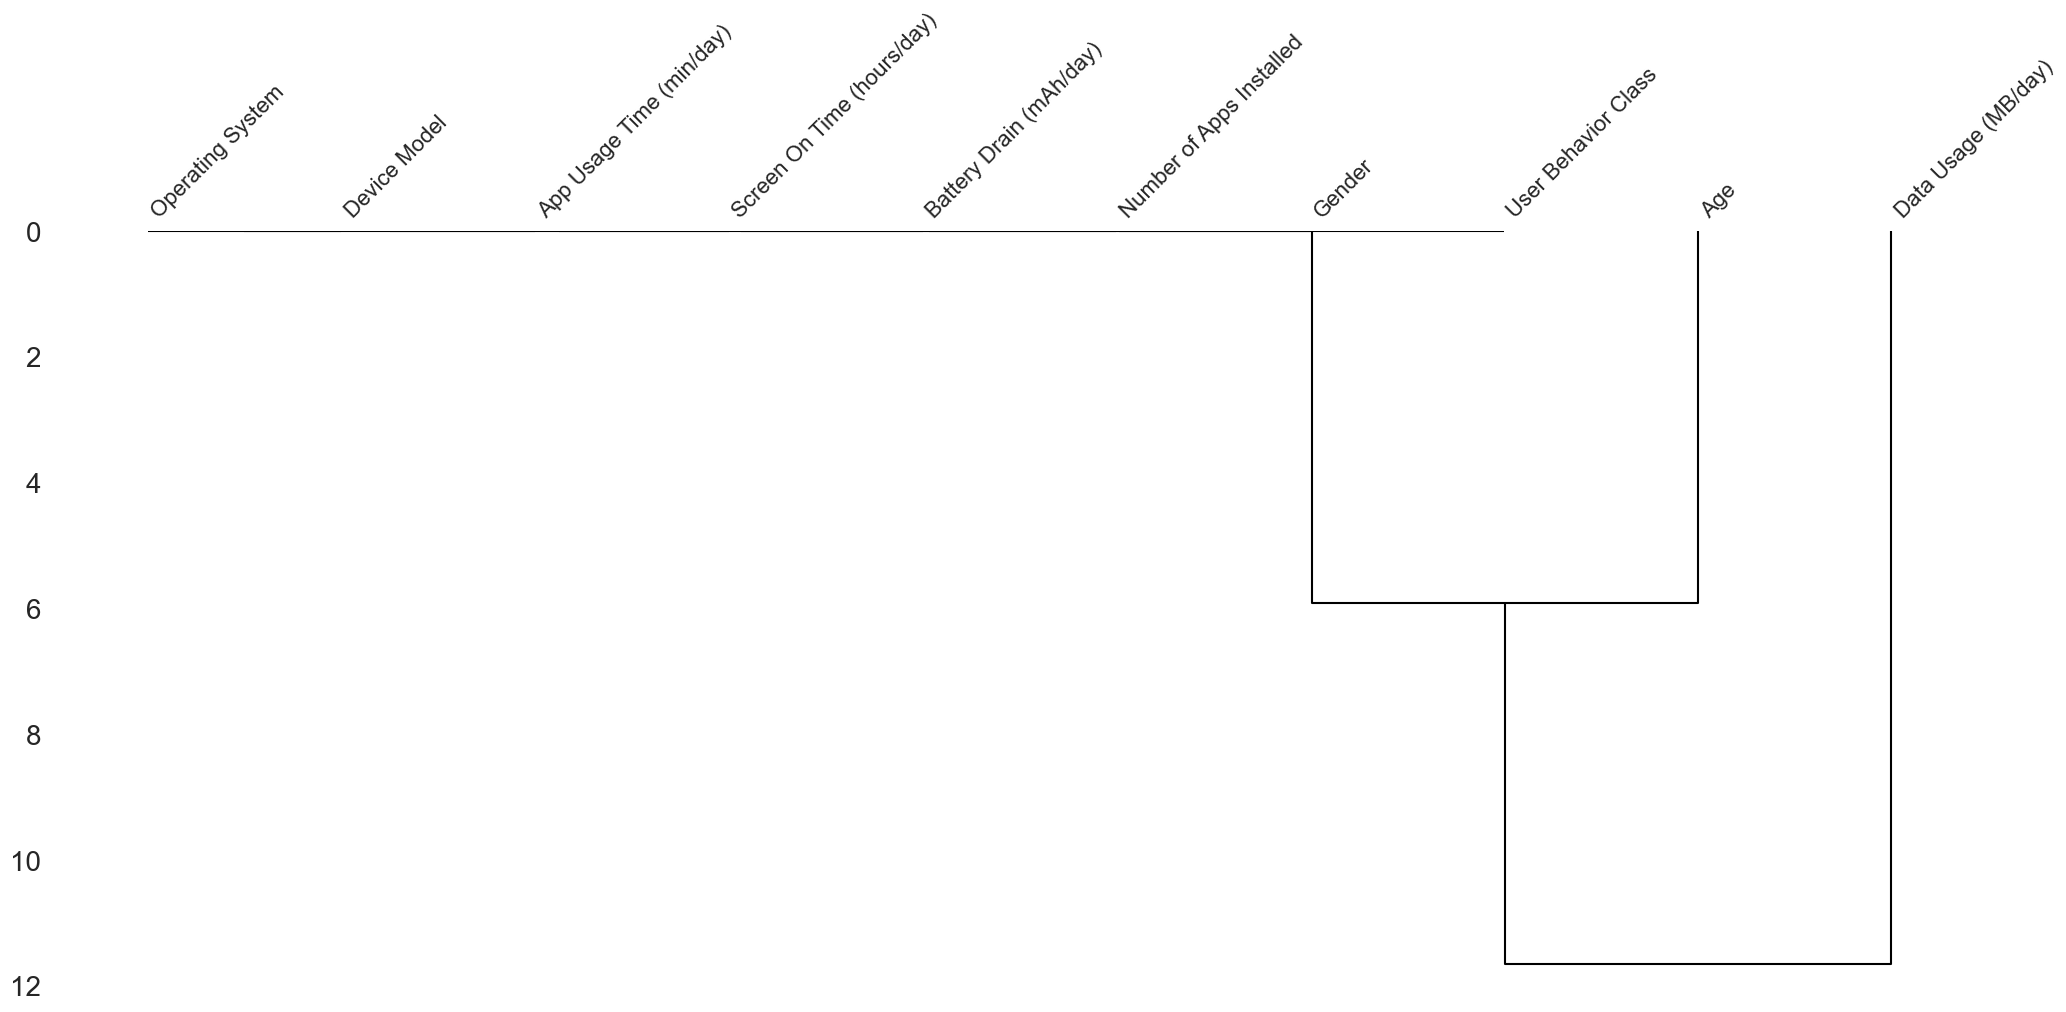

In [18]:
msno.dendrogram(df)

In [31]:
imputer = SimpleImputer(strategy='mean')

df['Age'] = imputer.fit_transform(df[['Age']])

In [42]:
knn_imputer = KNNImputer()

df['Data Usage (MB/day)'] = knn_imputer.fit_transform(df[['Data Usage (MB/day)']])

In [33]:
encoder = LabelEncoder()

df['Gender'] = encoder.fit_transform(df['Gender'])
df['Operating System'] = encoder.fit_transform(df['Operating System'])

In [34]:
df['Operating System'].unique()

array([0, 1])

In [35]:
df['Device Model'].unique()

array(['Google Pixel 5', 'OnePlus 9', 'Xiaomi Mi 11', 'iPhone 12',
       'Samsung Galaxy S21'], dtype=object)

In [44]:
df_encoded = pd.get_dummies(df, columns=['Device Model'])

In [45]:
df_encoded

,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12
0,0,393,6.4,1872,67,1122.000000,40.0,1,4,True,False,False,False,False
1,0,268,4.7,1331,42,944.000000,47.0,0,3,False,True,False,False,False
2,0,154,4.0,761,32,942.332143,42.0,1,2,False,False,False,True,False
3,0,239,4.8,1676,56,871.000000,20.0,1,3,True,False,False,False,False
4,1,187,4.3,1367,58,988.000000,31.0,0,3,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,92,3.9,1082,26,942.332143,22.0,1,2,False,False,False,False,True
696,0,316,6.8,1965,68,942.332143,59.0,1,4,False,False,False,True,False
697,0,99,3.1,942,22,457.000000,50.0,0,2,True,False,False,False,False
698,0,62,1.7,431,13,224.000000,44.0,1,1,False,False,True,False,False


In [48]:
x = df_encoded.drop(columns='User Behavior Class')
y = df_encoded['User Behavior Class']

In [49]:
x

,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12
0,0,393,6.4,1872,67,1122.000000,40.0,1,True,False,False,False,False
1,0,268,4.7,1331,42,944.000000,47.0,0,False,True,False,False,False
2,0,154,4.0,761,32,942.332143,42.0,1,False,False,False,True,False
3,0,239,4.8,1676,56,871.000000,20.0,1,True,False,False,False,False
4,1,187,4.3,1367,58,988.000000,31.0,0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,92,3.9,1082,26,942.332143,22.0,1,False,False,False,False,True
696,0,316,6.8,1965,68,942.332143,59.0,1,False,False,False,True,False
697,0,99,3.1,942,22,457.000000,50.0,0,True,False,False,False,False
698,0,62,1.7,431,13,224.000000,44.0,1,False,False,True,False,False


In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [51]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [54]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)

In [55]:
model = XGBClassifier()

model.fit(x_train, y_train_le)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [58]:
y_pred = model.predict(x_test)

In [59]:
y_pred = le.inverse_transform(y_pred)

In [60]:
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Classification Report\n:',classification_report(y_test,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))

Accuracy: 0.9857142857142858
Classification Report
:               precision    recall  f1-score   support

           1       0.96      1.00      0.98        25
           2       0.97      0.97      0.97        29
           3       1.00      0.97      0.98        30
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        28

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140

Confusion Matrix:
 [[25  0  0  0  0]
 [ 1 28  0  0  0]
 [ 0  1 29  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  0 28]]


In [65]:
## PIPELINE OF MODELS 

models = {
    'XGBClassifier' : XGBClassifier(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(),
    'RandomForestClassifier' : RandomForestClassifier(),
    'KNeighborsClassifier' : KNeighborsClassifier()
}

for name, model in models.items():
    
    model.fit(x_train, y_train_le)
    
    y_pred = model.predict(x_test)
    
    print(f'\n{name} Evaluate')
    print('Accuracy:',accuracy_score(y_test_le,y_pred))
    print('Classification Report\n:',classification_report(y_test_le,y_pred))
    print('Confusion Matrix:\n',confusion_matrix(y_test_le,y_pred))


XGBClassifier Evaluate
Accuracy: 0.9857142857142858
Classification Report
:               precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       0.97      0.97      0.97        29
           2       1.00      0.97      0.98        30
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        28

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140

Confusion Matrix:
 [[25  0  0  0  0]
 [ 1 28  0  0  0]
 [ 0  1 29  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  0 28]]

DecisionTreeClassifier Evaluate
Accuracy: 1.0
Classification Report
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        30
           3       1.00      1.00   

In [66]:
# Grid Search CV

x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.1)

In [67]:
scaler = StandardScaler()

x_train2 = scaler.fit_transform(x_train2)
x_test2 = scaler.transform(x_test2)

In [74]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40]
}

grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40], 'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [75]:
print(grid_search.best_params_)

{'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 3, 'weights': 'distance'}


In [76]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

In [77]:
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Classification Report\n:',classification_report(y_test,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))

Accuracy: 0.9642857142857143
Classification Report
:               precision    recall  f1-score   support

           1       0.96      0.88      0.92        25
           2       0.90      0.93      0.92        29
           3       0.97      1.00      0.98        30
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        28

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

Confusion Matrix:
 [[22  3  0  0  0]
 [ 1 27  1  0  0]
 [ 0  0 30  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  0 28]]
